##### [Accueil](../../index.ipynb)

# 6.3 Diviser pour régner

Le “diviser pour régner” (divide and conquer) est une méthode algorithmique basée sur le principe suivant:

On prend un problème (généralement complexe à résoudre), on divise ce problème en une multitude de petits problèmes, l'idée étant que les "petits problèmes" seront plus simples à résoudre que le problème original. Une fois les petits problèmes résolus, on recombine les "petits problèmes résolus" afin d'obtenir la solution du problème de départ.

La méthode se décompose en trois étapes :

1. Diviser : on divise l'instance de départ en de plus petites.
2. Régner : on résout l'algorithme sur les "petites" instances précédentes.
3. On fusionne les résultats précédents pour obtenir le résultat final.
Les algorithmes basés sur le paradigme "diviser pour régner" sont très souvent des algorithmes **récursifs**.

- [Comparaison de complexité sur la fonction puissance](exp_time_comparaison.ipynb)
- [Le tri fusion](tri_fusion.ipynb)


## Exemple sur la puissance d'un nombre



### Approche récursive

Lors de l’utilisation de la récursivité, nous avions vu l’exemple du calcul de la puissance d’un nombre qui 
utilisait cette définition récursive:

$$
\left\{
    \begin{array}{ll}
        x^0 = 1\\
        x^{n+1} = x \times x^n
    \end{array}
\right.
$$

Ce qui s'implémente en Python de la façon suivante:

In [1]:
def puissance(x, n):
    """
    Retourne x à la puissance n
    """
    if n==0:
        return 1
    else:
        return x*puissance(x, n-1)

Calculons la complexité temporelle T(n) de cet algorithme.
La complexité se détermine par le **nombre de multiplications nécessaires**.

$T(x^0) = 0$ et $T(x^n) = 1+T(x^{n-1})$ soit $\boxed{T(x^0) = 0}$ et $\boxed{T(x^n) -  T(x^{n-1}) = 1}$

On a donc: 

- $T(x^0) = 0$
- ${T(x^1) -  T(x^{0}) = 1}$
- ${T(x^2) -  T(x^{1}) = 1}$
- ${T(x^3) -  T(x^{2}) = 1}$
- ...

- ${T(x^n) -  T(x^{n-1}) = 1}$

En sommant toutes ces équations on obtient $T(x^0) + T(x^n) = n$ soit $\boxed{T(x^n) = n}$

**La complexité de cet algorithme est donc linéaire.**

=> Pour calculer 2^100 il faut effectuer 100 multiplications.



### Approche diviser pour régner

Voici une nouvelle approche : calculons $x^n$.

$$
\left\{
    \begin{array}{ll}
        x^0 = 1\\
        x^1 = x~evite~un~calcul\\
        si~n~est~pair~(n=2k)~alors~x^{2k} = x^{k} \times x^{k}\\
        si~n~est~impair~(n=2k+1)~alors~x^{2k+1} = x \times x^{2k}
    \end{array}
\right.
$$

Calculons la complexité temporelle de la méthode diviser pour régner.

$$
\left\{
    \begin{array}{ll}
        T(x^0) = 0\\
        T(x^1) = 0\\
        si~n~est~pair~(n=2k)~alors~T(x^{2k}) = 1 + T(x^{k})\\
        si~n~est~impair~(n=2k+1)~alors~T(x^{2k+1}) = 1 + T(x^{2k})
    \end{array}
\right.
$$

Ici la complexité est plus dure à calculer car elle dépend de la parité des puissances, par exemple:
- 15	=>14	=>7	=>6	=>3	=>2	=>1	=>0	(7 transitions)
- 16	=>8	=>4	=>2	=>1	=>0			(5 transitions)

Simplifions le problème en supposant que l’exposant est une puissance de 2 (4, 8, 16….).

Prenons l’exemple de $x^{64}$
$$ T(x^{64})=1+T(x^{32})=2+T(x^{16}=3+T(x^8)=4+CT(x^4)=5+T(x^2)=6+T(x^1)=6 $$

On remarque que $2^6=64$.

Pour une puissance de n, on peut approximer que la complexité est k avec $\boxed{2^k = n}$.

Comment extraire k de cette équation ? En utilisant le logarithme de base 2.

Ainsi $\boxed{T(n)=log_2(n)}$


La complexité est ici **logarithmique**.


### Comparaison des deux approches

<table>
    <thead><td>puissance</td><td>complexité 1ère approche</td><td>complexité diviser pour régner</td></thead>
    <tbody>
        <tr><td>16</td><td>16</td><td>4</td></tr>
        <tr><td>128</td><td>128</td><td>7</td></tr>
        <tr><td>1024</td><td>1024</td><td>10</td></tr>
    </tbody>
</table>

<div class="alert alert-danger">Implémenter la fonction puissance avec les deux méthodes et comparer les temps de résolutions grace à un nuage de points.</div>

In [2]:
def puissanceA(x, n):
    """
    Retourne x à la puissance n
    en utilisant la récursivité basique
    """
    pass

puissanceA(2,6)

64

In [18]:
def puissanceB(x,n):
    """
    Retourne x à la puissance n
    en utilisant la méthode diviser pour régner    
    """
    pass

puissanceB(2,6)

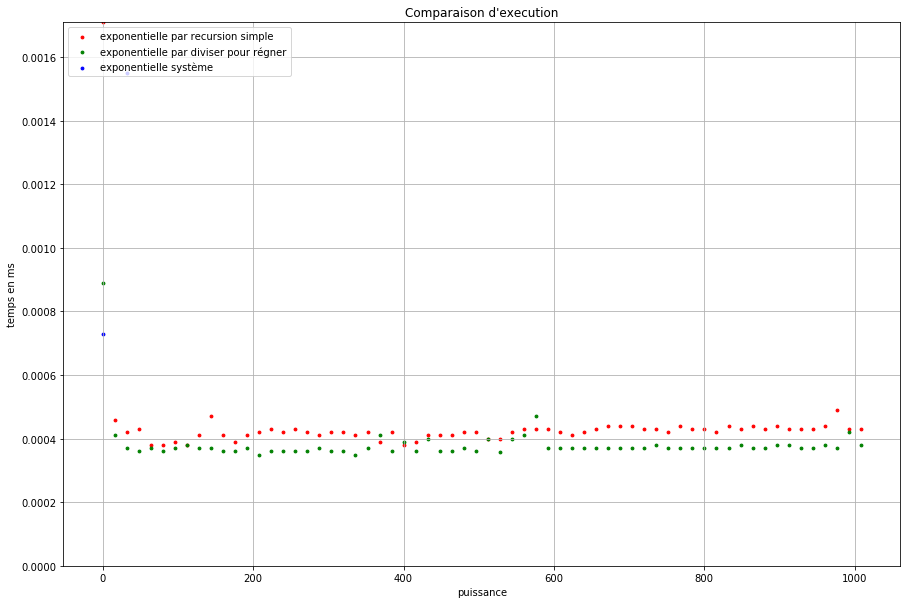

In [19]:
import timeit
import matplotlib.pyplot as plt

# faisons une liste des puissance et du pas
puissances = [i for i in range(0, 1024, 16)]
resultsA=[]
resultsB=[]
resultsC=[]
# On teste sur ce nombre
number=60
for p in puissances:
    # Cas de la puissance recursive basique
    starttime = timeit.default_timer()
    puissanceA(number,p)
    diffA=timeit.default_timer() - starttime
    resultsA.append(diffA)
    # Cas de la puissance recursive diviser pour régner
    starttime = timeit.default_timer()
    puissanceB(number,p)
    diffB=timeit.default_timer() - starttime
    resultsB.append(diffB)
    # Cas de la puissance système
    starttime = timeit.default_timer()
    number**p
    diffC=timeit.default_timer() - starttime
    resultsC.append(diffC)

# création du graphique de points
x = [p for p in puissances]
yA = [r*1000 for r in resultsA]
yB = [r*1000 for r in resultsB]
yC = [r*1000 for r in resultsC]

plt.figure(figsize=(15,10))
plt.ylim(top=1000*max(resultsA))
plt.scatter(x,yA, c='red', s=8, label="exponentielle par recursion simple")
plt.scatter(x,yB, c='green', s=8, label="exponentielle par diviser pour régner")
plt.scatter(x,yC, c='blue', s=8, label="exponentielle système")
plt.grid(which='both')
plt.title("Comparaison d'execution")
plt.xlabel('puissance')
plt.ylabel('temps en ms')
plt.legend(loc='upper left')
plt.show()

## Le tri fusion

[voir la chorégraphie en musique](https://www.youtube.com/watch?v=ROalU379l3U)

 [une vidéo explicative](https://www.youtube.com/watch?v=OEmlVnH3aUg)

La recherche dichotomique d’un élément dans une liste triée, vue en première, consiste à séparer la liste triée en 2 sous listes, puis à réitérer l’opération en se ramenant à un seul élément.

Exemple : 10 est-il dans [0, 2, 5, 8, 12, 15, 20]?

- On coupe la liste est deux  en  2 : [0, 2, 5] et [8, 12, 15, 20] on cherche uniquement à droite;
- On coupe la liste est deux  en  2 : [8, 12] et [15, 20] on cherche uniquement à gauche;
- On coupe la liste est deux  en  2 : [8] et [12].
=> Non

On remarque que la résolution d’un des deux sous-problèmes consiste ici à ne rien faire.

Le tri fusion s’appuie sur ce mécanisme de **dichotomie** et s’implémente de façon **récursive**.

### Histoire

Le tri fusion a été inventé en 1945 par un des pères de l'informatique, [John von Neumann].(../../../Premiere/6_Architecture/1_modele_architecture.ipynb#von_neumann)

### Principe
Comme tout algorithme de tri, le principe consiste à partir d’une liste désordonnée et à obtenir une liste triée dans l’ordre croissant.
Voici la décomposition du principe:
- On partitionne la liste en deux parts;
- On fusionne l’ensemble des parties.

La principale difficulté provient de l’aspect **récursif** de l’implémentation.

**Exemples**
Voici la représentation du résultat pour la liste [4, 3, 2, 1]
Dans le cas d’une longueur de liste qui est une puissance de 2, le graphe est symétrique.

![](graphe1.png)

Et le voici pour la liste [5, 4, 3, 2, 1]
![](graphe2.png)

Explication du tri de la liste [4, 2, 8, 6, 0, 5, 1, 7, 3, 9] en danse et musique.
![](graphe3.png)

### Implémentation en Python

La fusion

Nous allons commencer par implémenter la fusion de 2 listes triées.
Voici la signature de la fonction:





In [20]:
def fusion(T1, T2):
    """
    T1 : une liste triée
    T2 : une liste triée
    Retourne la fusion des 2 listes triée
    """
    result=[]
    # TODO
    return result


### Le tri fusion

Implémenter, de manière récursive, la division en deux parties, d’une liste non triée. Puis inclure la fonction **fusion** dans votre fonction
Voici la signature de la fonction:


In [ ]:
def tri_fusion(tableau):
    """
    tableau : une liste d'entiers ou de flottant
    Retourne le tableau trié dans l'ordre croissant
    """
    # TODO

La complexité d’un [tri par insertion](../../../Premiere/8_Algorithmique/2_tri_insertion_selection.ipynb) est quadratique : $\boxed{T(insertion)=n^2}$


Le calcul de la complexité de l’algorithme du tri fusion n’est pas au programme mais on peut “sentir” que:
Pour une liste qui contient $2^k$ éléments, il faudra k étapes pour se ramener à des listes uniques. La complexité pour la division est donc logarithmique.

Ensuite, pour la fusion, prend également k étapes, mais la complexité dépend de la longueur des listes à fusionner qui double à chaque étape, on se ramène donc à du linéaire.
On admettra que la complexité pour trier une liste de n éléments est :

$\boxed{T(fusion)=nlog_2(n)}$

<div class="alert alert-danger">Comparer les temps de résolutions entre le tri insertion et le tri fusion.</div>


## Conclusion

Le principe de la méthode diviser pour régner est:
- découper le problème en sous-problèmes qui s’énoncent de la même manière;
- résoudre les cas limites;
- combiner les solutions.

Nous avons observé que dans certains cas (calcul de puissance et tri fusion), le gain de temps est considérable par rapport à une approche plus “naïve”.

Cette méthode peut se révéler parfois efficace parfois non, tout dépend du type de problème à résoudre.

Le calcul de la complexité peut donner un ordre d’idée du comportement mais il est souvent difficile à solutionner car il faut expliciter une suite mathématique.
Le relevé des temps de calcul permet d’observer, de manière réelle, la différence de temps d'exécution de 2 algorithmes.


##### [Accueil](../../index.ipynb)